# Bank Marketing Campaign Analysis


*This project aims to analyze data from a bank marketing campaign to predict customer behavior using machine learning techniques. The dataset contains customer information and details about past marketing efforts.*

## Objective:
*Classification Task: Predict whether a client will subscribe to a term deposit (yes/no).*  
*Regression Task: Analyze the impact of numerical features (e.g., balance, duration) on customer behavior.*

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import boxcox

# Load dataset
df = pd.read_excel("C:\\Users\\AS\\Downloads\\My project_final\\bank-full.xlsx")

# Show basic info
print("🔹 Shape:", df.shape)
print("🔹 Columns:\n", df.columns)
print("🔹 Summary:\n", df.describe())

🔹 Shape: (45211, 17)
🔹 Columns:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
🔹 Summary:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays   

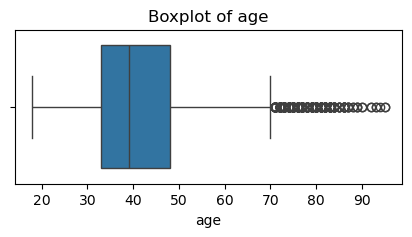

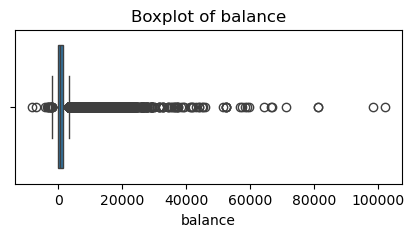

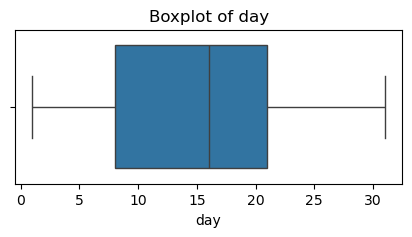

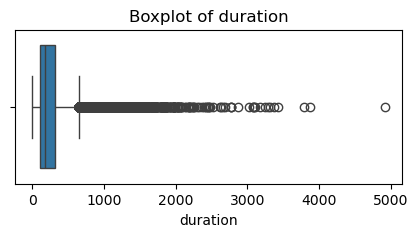

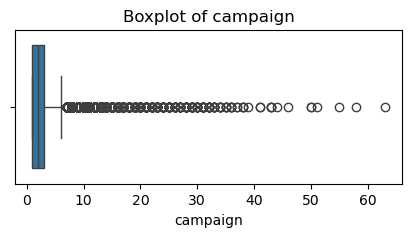

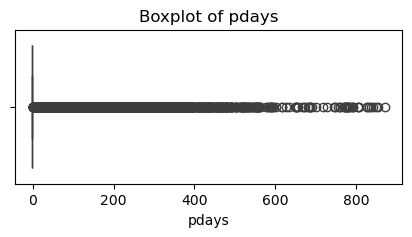

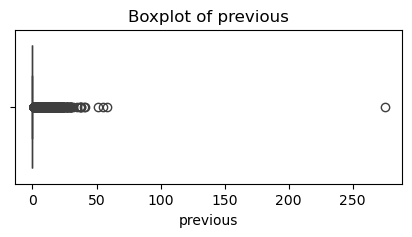

In [27]:
# ----------------------------
# 🔍 Visualizing Outliers (Boxplots)
# ----------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# ----------------------------
# 📦 Removing Outliers (IQR method)
# ----------------------------
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

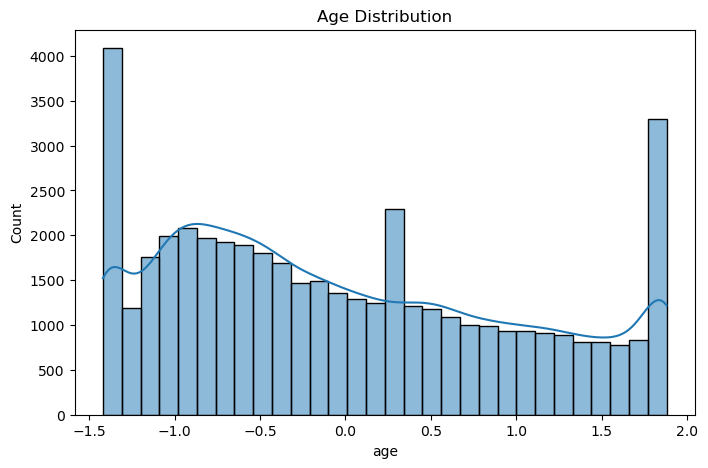

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()



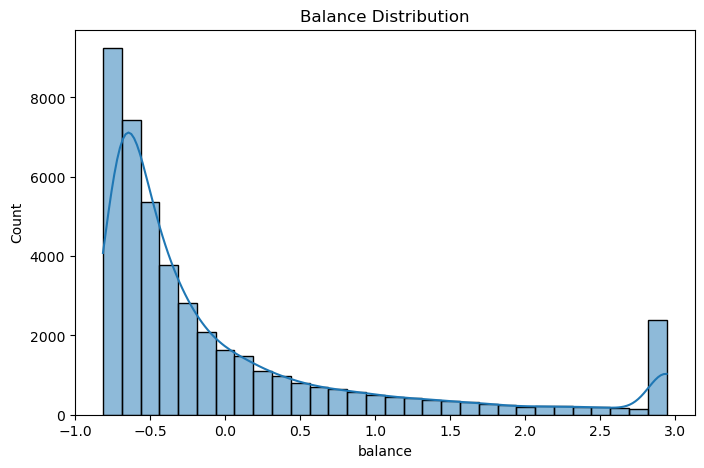

In [79]:
# 2. Balance distribution
plt.figure(figsize=(8,5))
sns.histplot(df['balance'], kde=True, bins=30)
plt.title('Balance Distribution')
plt.show()



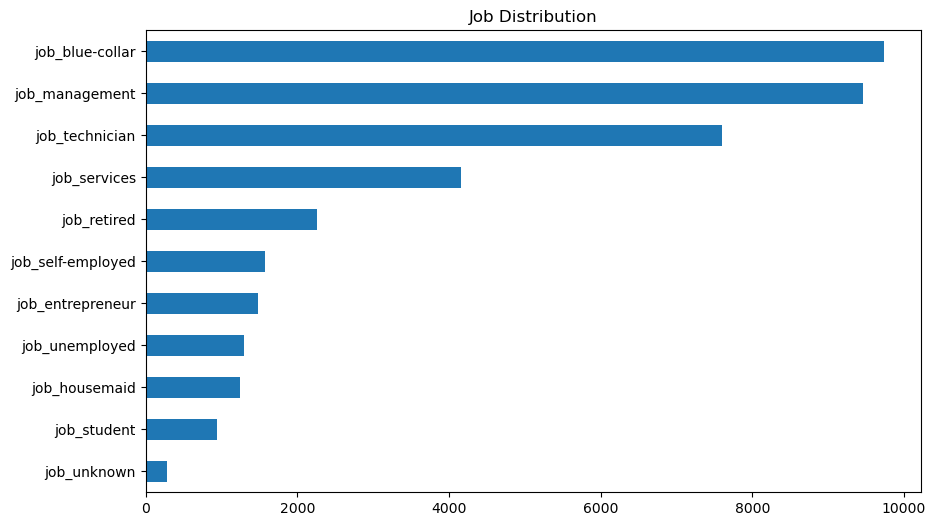

In [81]:
# 3. Job types
plt.figure(figsize=(10,6))
df.filter(like='job_').sum().sort_values().plot(kind='barh')
plt.title('Job Distribution')
plt.show()



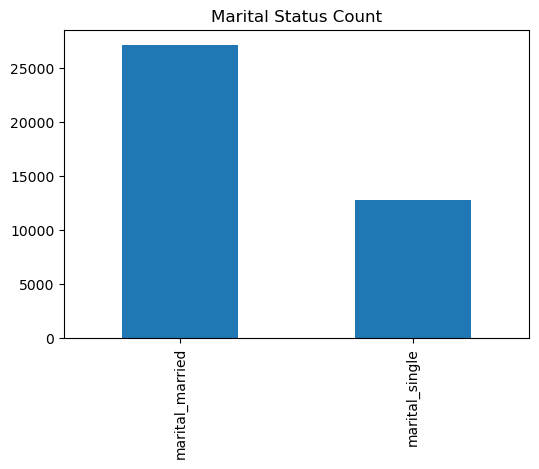

In [83]:
# 4. Marital status
plt.figure(figsize=(6,4))
df[['marital_married', 'marital_single']].sum().plot(kind='bar')
plt.title('Marital Status Count')
plt.show()




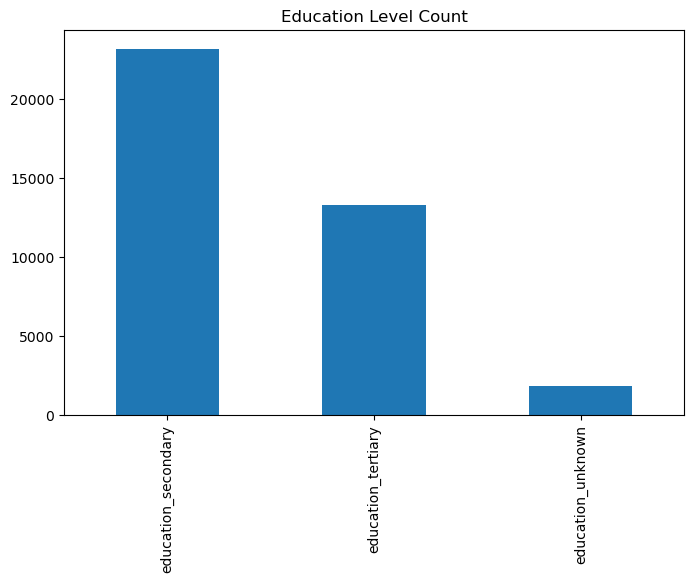

In [85]:
# 5. Education
plt.figure(figsize=(8,5))
df[['education_secondary', 'education_tertiary', 'education_unknown']].sum().plot(kind='bar')
plt.title('Education Level Count')
plt.show()

In [28]:
# ----------------------------
# 🔁 Encoding Categorical Variables
# ----------------------------
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [29]:
# 📊 Check & Fix Skewness — Safely
skewed = {}

for col in num_cols:
    if df[col].nunique() > 1:  # Only consider columns with variation
        sk = skew(df[col])
        if abs(sk) > 1:
            if df[col].min() > 0:  # Box-Cox needs positive values
                df[col], _ = boxcox(df[col] + 1)
        skewed[col] = sk

# Print skewed columns
print("✅ Skewness values (before correction):")
for k, v in sorted(skewed.items(), key=lambda item: abs(item[1]), reverse=True):
    print(f"{k}: {v:.2f}")


✅ Skewness values (before correction):
balance: 1.34
campaign: 1.15
duration: 1.04
age: 0.38
day: 0.11


In [30]:

# ✅ Apply Box-Cox transformation where needed (only positive and highly skewed features)
for col in skewed:
    if df[col].min() > 0 and abs(skewed[col]) > 1:
        df[col], _ = boxcox(df[col] + 1)  # Add 1 to avoid zero issues

# 🔁 Scaling numeric features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# ✅ Save the cleaned and preprocessed dataset
df.to_csv("bank-full-processed.csv", index=False)
print("✅ Preprocessing completed and saved.")


✅ Preprocessing completed and saved.


In [73]:
# 🔍 Recheck skewness after transformation
new_skewed = df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
print("✅ Skewness after Box-Cox Transformation:\n")
print(new_skewed)


✅ Skewness after Box-Cox Transformation:

pdays       2.225218
previous    2.212510
balance     1.783957
campaign    1.546923
duration    1.295152
age         0.394181
day         0.082012
dtype: float64


In [31]:
# Load the Preprocessed Data
df = pd.read_csv("C:/Users/AS/Downloads/My project_final/bank-full-processed.csv")


In [34]:
print(df.columns)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report# Features and Target

X = df.drop(columns=['y_yes'])
y = df['y_yes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


🔹 Random Forest Accuracy: 0.9017
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      7952
        True       0.66      0.38      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043


🔹 Logistic Regression Accuracy: 0.8967
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      7952
        True       0.62      0.36      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043


🔹 Support Vector Machine Accuracy: 0.8999
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      7952
        True       0.67      0.34      0.45      1091

    accuracy                           0.90      9043
   macro av

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Reload or define your features and target variable
X = df.drop(columns=['y_yes'])  # Assuming 'y_yes' is your target after encoding
y = df['y_yes']

# Step 2: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Step 3: Define parameter grid for Random Forest
param_rf = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("✅ Best Random Forest Params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

✅ Best Random Forest Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [59]:
# Step 4: Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
print("\n🎯 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


🎯 Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.95      7952
        True       0.67      0.38      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [60]:
# Step 5: Define parameter grid for Logistic Regression
param_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("\n✅ Best Logistic Regression Params:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_


✅ Best Logistic Regression Params: {'C': 10, 'solver': 'lbfgs'}


In [61]:
# Step 6: Evaluate Logistic Regression
y_pred_lr = best_lr.predict(X_test)
print("\n🎯 Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


🎯 Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      7952
        True       0.63      0.37      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [62]:
import joblib
import pandas as pd

# Save the best classifier model
joblib.dump(best_rf, 'best_classifier_model.pkl')  # Change to best_lr if you're using Logistic Regression
print("✅ Best classifier model saved as 'best_classifier_model.pkl'")

# Optional: Save Logistic Regression model too
joblib.dump(best_lr, 'logistic_regression_model.pkl')

# Generate predictions and save to CSV
y_pred = best_rf.predict(X_test)  # Or best_lr.predict(X_test)

pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

pred_df.to_csv('model_predictions.csv', index=False)
print("📄 Predictions saved to 'model_predictions.csv'")


✅ Best classifier model saved as 'best_classifier_model.pkl'
📄 Predictions saved to 'model_predictions.csv'


## Create the Pipeline

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Scaling numeric features
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Classifier
])

# Train pipeline on your training data
pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(pipeline, 'classification_pipeline.pkl')
print("✅ Pipeline created and saved successfully!")


✅ Pipeline created and saved successfully!


## Load and Test on Unseen Data

In [64]:
# Load pipeline
pipeline = joblib.load('classification_pipeline.pkl')

# Example unseen data (You can replace this with real unseen CSV or input)
unseen_data = pd.DataFrame({
    'age': [35],
    'balance': [1000],
    'day': [5],
    'duration': [300],
    'campaign': [1],
    'pdays': [999],
    'previous': [0],
    # And all other columns in the correct order...
}, columns=X_train.columns)  # Make sure columns match!

# Make prediction
prediction = pipeline.predict(unseen_data)
print("🧠 Prediction for unseen data:", prediction)


🧠 Prediction for unseen data: [ True]
